In [4]:
import yfinance as yf
import pandas as pd

# Define the list of tickers and their corresponding names
tickers = {
    "CL=F": "WTI",
    "USDKRW=X": "USDKRW",
    "^KS11": "KOSPI200",
    "^VIX": "VIX",
    # 여기에 다른 ticker와 name을 추가할 수 있습니다.
}

data = pd.DataFrame()

# Download data for each ticker and concatenate into a single DataFrame
for ticker, name in tickers.items():
    series = yf.download(ticker, start="2006-12-30", end="2023-09-21")['Close']
    series.name = name
    if data.empty:
        data = pd.DataFrame(series).reset_index()
    else:
        data = pd.merge(data, pd.DataFrame(series).reset_index(), on='Date', how='outer')

# Rename the 'Date' column and set it as index
data.rename(columns={'Date': 'Date'}, inplace=True)
data.set_index('Date', inplace=True)

# Handling missing data
data.fillna(method='ffill', inplace=True)  # Forward fill to handle missing data
data.fillna(method='bfill', inplace=True)  # Backward fill to handle missing data at the beginning

# Calculate the forward stage for KOSPI 200
forward_days = 60
data['Forward_Return'] = data['KOSPI200'].shift(-forward_days) / data['KOSPI200'] - 1
data['forward_stage'] = pd.cut(data['Forward_Return'], bins=[-float('inf'), 0, 0.04, float('inf')], labels=['down', 'neutral', 'up'])

# Drop rows with NaN in 'forward_stage'
data.dropna(subset=['forward_stage'], inplace=True)

# Round numerical columns to 2 decimal places
numerical_columns = [name for name in tickers.values()]
data[numerical_columns] = data[numerical_columns].round(2)

# Reset index and format 'Date' column
data.reset_index(inplace=True)
data['Date'] = data['Date'].dt.strftime('%y-%m-%d')

# Drop 'Forward_Return' column and reorder columns
data = data[['Date', 'forward_stage'] + numerical_columns]

# Save to CSV if needed
data.to_csv('1.csv')

print(data.head())


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
       Date forward_stage    WTI  USDKRW  KOSPI200    VIX
0  07-01-02       neutral  61.05  914.42   1435.26  12.04
1  07-01-03       neutral  58.32  914.31   1409.35  12.04
2  07-01-04            up  55.59  925.24   1397.29  11.51
3  07-01-05            up  56.31  925.44   1385.76  12.14
4  07-01-08            up  56.09  924.37   1370.81  12.00


In [7]:
import yfinance as yf
import pandas as pd

# 티커와 그에 해당하는 이름을 정의합니다.
# 사용자는 이 딕셔너리에 새로운 티커와 이름을 추가할 수 있습니다.
tickers = {
    "CL=F": "WTI",
    "USDKRW=X": "USDKRW",
    "^KS11": "KOSPI200",
    "^VIX": "VIX"
}

data = pd.DataFrame()  # 빈 DataFrame을 초기화합니다.

# 각 티커에 대한 데이터를 다운로드하고 단일 DataFrame으로 병합합니다.
for ticker, name in tickers.items():
    series = yf.download(ticker, start="2006-12-30", end="2023-09-21")['Close']  # 각 티커에 대한 종가 데이터를 다운로드합니다.
    series.name = name  # 다운로드한 시리즈의 이름을 설정합니다.
    if data.empty:  # 첫 번째 티커의 경우, data DataFrame을 초기화합니다.
        data = pd.DataFrame(series).reset_index()
    else:  # 그 이후의 티커에 대해서는 data DataFrame과 병합합니다.
        data = pd.merge(data, pd.DataFrame(series).reset_index(), on='Date', how='outer')

# 'Date' 컬럼의 이름을 변경하고 인덱스로 설정합니다.
data.rename(columns={'Date': 'Date'}, inplace=True)
data.set_index('Date', inplace=True)

# 누락된 데이터를 처리합니다.
data.fillna(method='ffill', inplace=True)  # 누락된 데이터를 앞쪽으로 채웁니다.
data.fillna(method='bfill', inplace=True)  # 시작 부분의 누락된 데이터를 뒤쪽으로 채웁니다.

# KOSPI 200에 대한 포워드 스테이지를 계산합니다.
forward_days = 60
data['Forward_Return'] = data['KOSPI200'].shift(-forward_days) / data['KOSPI200'] - 1  # 포워드 리턴을 계산합니다.
data['forward_stage'] = pd.cut(data['Forward_Return'], bins=[-float('inf'), 0, 0.04, float('inf')], labels=['down', 'neutral', 'up'])  # 포워드 리턴을 기반으로 스테이지를 분류합니다.

# 'forward_stage'에서 NaN이 있는 행을 삭제합니다.
data.dropna(subset=['forward_stage'], inplace=True)

# 숫자형 컬럼을 2소수점 자리로 반올림합니다.
numerical_columns = [name for name in tickers.values() if name != 'KOSPI200']  # 'KOSPI200'을 제외한 모든 컬럼을 선택합니다.
data[numerical_columns] = data[numerical_columns].round(2)  # 선택한 컬럼을 반올림합니다.

# 인덱스를 재설정하고 'Date' 컬럼을 형식화합니다.
data.reset_index(inplace=True)
data['Date'] = data['Date'].dt.strftime('%y-%m-%d')

# 'Forward_Return' 컬럼을 삭제하고 컬럼 순서를 재배열합니다.
data = data[['Date', 'forward_stage'] + numerical_columns]

# 필요한 경우 CSV로 저장합니다.
data.to_csv('1.csv', index=False)

# DataFrame의 처음 몇 행을 출력합니다.
print(data.head())


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
       Date forward_stage    WTI  USDKRW    VIX
0  07-01-02       neutral  61.05  914.42  12.04
1  07-01-03       neutral  58.32  914.31  12.04
2  07-01-04            up  55.59  925.24  11.51
3  07-01-05            up  56.31  925.44  12.14
4  07-01-08            up  56.09  924.37  12.00


In [8]:
# -*- coding: utf-8 -*- 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import sklearn.metrics as mt 
from sklearn.tree import export_graphviz 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import StratifiedShuffleSplit 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV 
import joblib 
from sklearn.metrics import confusion_matrix 

# 1. Load the modified CSV data
model_data = pd.read_csv("1.csv")

# Set 'Date' column as index
model_data.set_index('Date', inplace=True)

# 2. Generate complete data of features and label
X = model_data.drop(columns=['forward_stage'])  # Exclude the 'forward_stage' column for features
y = model_data['forward_stage']  # Use 'forward_stage' column as label

X_past = X[y.notna()] 
y_past = y[y.notna()]

# 3. Split the data into train and test
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(X_past, y_past):
    X_train, X_test = X_past.iloc[train_index,], X_past.iloc[test_index,] 
    y_train, y_test = y_past.iloc[train_index], y_past.iloc[test_index]

# 4. Model fine-tuning: find optimal hyperparameters
rnd_clf = RandomForestClassifier(n_estimators=100, n_jobs=1, random_state=42)  # n_jobs를 1로 설정
param_dist_rf = {'n_estimators': [50, 100, 500], 'max_leaf_nodes': [20, 30, 40, 50], 'max_features': [1, 2, 3]} 

rnd_search = RandomizedSearchCV(rnd_clf, param_dist_rf, cv=10, random_state=42)
rnd_search.fit(X_train, y_train)
print(rnd_search.best_params_)

# 5. Train the model and evaluate it using K-fold cross-validation
rnd_search = RandomizedSearchCV(rnd_clf, param_dist_rf, cv=10, random_state=42, n_jobs=1)  # n_jobs를 1로 설정
rnd_scores = cross_val_score(rnd_clf, X_train, y_train, scoring="accuracy", cv=10)
print("\n<10-fold cross-validation>")
print("accuracy score mean: ", rnd_scores.mean())

# 6. Train the final model
rnd_clf.fit(X_train, y_train)
print("\n<AI model: machine learning done >")
print("accuracy_score of train data(0.8 of sample): ", rnd_clf.score(X_train, y_train))

# 7. Evaluate the model on test data
print("accuracy_score of test data(0.2 of sample): ", rnd_clf.score(X_test, y_test))

# 8. Check the confusion matrix
y_test_pred = rnd_clf.predict(X_test) 
cm1 = confusion_matrix(y_test, y_test_pred, labels=["up", "neutral", "down"]) 
print("\n<Confusion matrix>")
print("(of test)")
print("up", "neutral", "down")
print(cm1)
cm2 = confusion_matrix(y_past, rnd_clf.predict(X_past), labels=["up", "neutral", "down"]) 
print("(of all)")
print("up", "neutral", "down")
print(cm2)

# 9. Check feature importance
print("\n<Feature importance>")
for name, score in zip(X.columns, rnd_clf.feature_importances_):
    print(name, ": ", score)

# 10. Generate prediction data for backtesting
y_prediction = rnd_clf.predict(X)
y_pred = pd.Series(y_prediction, index=y.index)

# 11. Save the model
joblib.dump(rnd_clf, "forecast_model.pkl")
print("\n< AI model: save >")


{'n_estimators': 500, 'max_leaf_nodes': 50, 'max_features': 3}

<10-fold cross-validation>
accuracy score mean:  0.7466607684529827

<AI model: machine learning done >
accuracy_score of train data(0.8 of sample):  1.0
accuracy_score of test data(0.2 of sample):  0.759581881533101

<Confusion matrix>
(of test)
up neutral down
[[251  31  28]
 [ 46 105  39]
 [ 27  36 298]]
(of all)
up neutral down
[[1490   31   28]
 [  46  866   39]
 [  27   36 1740]]

<Feature importance>
WTI :  0.36568982086547985
USDKRW :  0.3148383148569979
VIX :  0.3194718642775223

< AI model: save >


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn.ensemble import RandomForestClassifier

# 1. 모델 로드
rnd_clf = joblib.load("forecast_model.pkl")
print("\n< AI model: load >")

# 2. new daily raw data 가져오기
model_data = pd.read_csv("1.csv")

# 'forward_stage' 컬럼을 숫자로 변환합니다.
categories = model_data['forward_stage'].astype('category')
model_data['forward_stage'] = categories.cat.codes

# X는 'forward_stage'와 'Date'를 제외한 모든 컬럼을 포함해야 합니다.
X = model_data.drop(columns=['forward_stage', 'Date'])
X.columns = X.columns.astype(str)  # Set feature names to avoid warning
y = model_data["forward_stage"]

# y가 NaN이 아닌 행만 선택합니다.
X_past = X[y.notna()]
y_past = y[y.notna()]

# 3. new daily raw data 전체 학습
rnd_clf.fit(X_past, y_past)
print("\n< AI model: machine learning done >")
print("accuracy_score of whole data: ", rnd_clf.score(X_past, y_past))

# 4. 현재(마지막) 데이터 표시
print("\n<Current status>")
for col, score in zip(X.columns, X.iloc[-1]):
    print("{:20} : {:>8.3f}".format(col, score))

X_current = np.array(X.iloc[-1]).reshape(1, -1)

# 5. 현재 전망
print("\n< AI model: forecasting >")
y_current_pred = rnd_clf.predict(X_current)
print("forecast: ", categories.cat.categories[y_current_pred[0]])

# 현재전망의 확률표
prob_current = rnd_clf.predict_proba(X_current)
y_names = rnd_clf.classes_
print("\n[class] : [prob]")
for name, prob in zip(categories.cat.categories[y_names], prob_current[0]):
    print("{:7} : {:.2f}".format(name, prob))

# # 6. 2023년 일별 전망치의 확률 변화
# # 전기간 전망치 확률 데이터생성
# prob = rnd_clf.predict_proba(X)
# prob_df = pd.DataFrame(prob, columns=categories.cat.categories)

# # '2023'이라는 컬럼이나 인덱스는 없으므로, 'Date' 컬럼에서 '2023'년에 해당하는 데이터를 선택해야 합니다.
# model_data['Year'] = pd.to_datetime(model_data['Date'], format='%y-%m-%d').dt.year
# prob_2023 = prob_df[model_data['Year'] == 2023]

# # '2023'년에 해당하는 날짜를 가져옵니다.
# dates_2023 = model_data.loc[model_data['Year'] == 2023, 'Date']

# plt.bar(dates_2023, prob_2023['up'], label='up', color='r')
# plt.bar(dates_2023, prob_2023['neutral'], label='neutral', color='g', bottom=prob_2023['up'])
# plt.bar(dates_2023, prob_2023['down'], label='down', color='b', bottom=prob_2023[['up', 'neutral']].sum(axis=1))
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
# plt.legend()
# plt.show()



< AI model: load >

< AI model: machine learning done >
accuracy_score of whole data:  1.0

<Current status>
WTI                  :   90.280
USDKRW               : 1149.600
VIX                  :   14.170

< AI model: forecasting >
forecast:  up

[class] : [prob]
down    : 0.07
neutral : 0.04
up      : 0.89


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [17]:
print(rnd_clf.classes_)


[0 1 2]


C:\Users\USER\AppData\Local\Temp\ipykernel_1152\3519552187.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  model_data['Date'] = pd.to_datetime(model_data['Date'], errors='coerce')


y_names:  [0 1 2]
Columns in prob_monthly:  Index([0, 1, 2], dtype='object')


C:\Users\USER\AppData\Local\Temp\ipykernel_1152\3519552187.py:50: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  label_up = 'up' if 'up' in y_names else y_names[2]  # 2는 'up'이라고 예상되는 위치입니다.
C:\Users\USER\AppData\Local\Temp\ipykernel_1152\3519552187.py:51: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  label_neutral = 'neutral' if 'neutral' in y_names else y_names[1]  # 1은 'neutral'이라고 예상되는 위치입니다.
C:\Users\USER\AppData\Local\Temp\ipykernel_1152\3519552187.py:52: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  label_down = 'down' if 'down' in y_names else y_names[0]  # 0은 'down'이라고 예상되는 위치입니다.


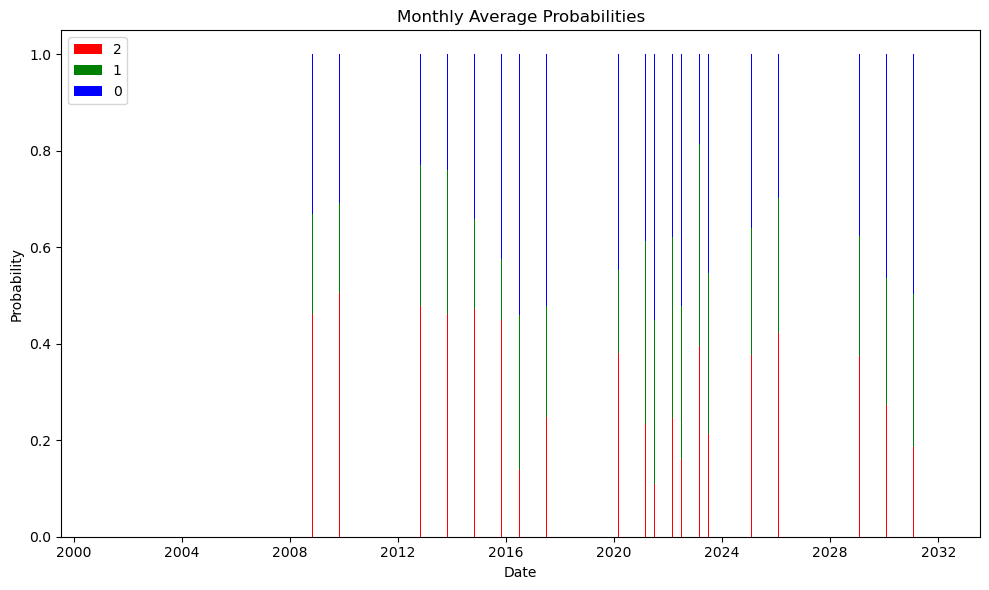

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn.ensemble import RandomForestClassifier

# 데이터 로드
model_data = pd.read_csv("1.csv")

# 'Date' 컬럼을 datetime 유형으로 변환
model_data['Date'] = pd.to_datetime(model_data['Date'], errors='coerce')

# 'forward_stage' 컬럼을 숫자로 변환합니다.
model_data['forward_stage'] = model_data['forward_stage'].astype('category').cat.codes

# X는 'forward_stage'와 'Date'를 제외한 모든 컬럼을 포함해야 합니다.
X = model_data.drop(columns=['forward_stage', 'Date'])
y = model_data["forward_stage"]

# y가 NaN이 아닌 행만 선택합니다.
X_past = X[y.notna()]
y_past = y[y.notna()]

# 모델 로드 및 학습
rnd_clf = joblib.load("forecast_model.pkl")
rnd_clf.fit(X_past, y_past)

# 전체 데이터 세트에 대한 예측 확률 계산
prob = rnd_clf.predict_proba(X)
y_names = rnd_clf.classes_
prob_df = pd.DataFrame(prob, columns=y_names)

# 'Date' 컬럼을 prob_df에 추가
prob_df['Date'] = model_data['Date']

# 'Date' 컬럼을 인덱스로 설정
prob_df.set_index('Date', inplace=True)

# 월별로 데이터를 리샘플링하고 평균 확률을 계산
prob_monthly = prob_df.resample('M').mean()
# ...

# y_names 확인
print("y_names: ", y_names)

# prob_monthly의 컬럼들 확인
print("Columns in prob_monthly: ", prob_monthly.columns)

# 만약 'up', 'neutral', 'down'이 y_names에 없다면, 해당 이름을 y_names에서 찾아서 사용합니다.
label_up = 'up' if 'up' in y_names else y_names[2]  # 2는 'up'이라고 예상되는 위치입니다.
label_neutral = 'neutral' if 'neutral' in y_names else y_names[1]  # 1은 'neutral'이라고 예상되는 위치입니다.
label_down = 'down' if 'down' in y_names else y_names[0]  # 0은 'down'이라고 예상되는 위치입니다.

# 월별로 그래프를 그립니다.
plt.figure(figsize=(10,6))
plt.bar(prob_monthly.index, prob_monthly[label_up], label=label_up, color='r')
plt.bar(prob_monthly.index, prob_monthly[label_neutral], label=label_neutral, color='g', bottom=prob_monthly[label_up])
plt.bar(prob_monthly.index, prob_monthly[label_down], label=label_down, color='b', bottom=prob_monthly[[label_up, label_neutral]].sum(axis=1))
plt.xlabel('Date')
plt.ylabel('Probability')
plt.title('Monthly Average Probabilities')
plt.legend()
plt.tight_layout()
plt.show()
